# One Dimensional Zero Temperature Random Field Ising Model for Magentization of Ferromagnetic Material

Consider a 1-dimensional square lattice with Ising spins (±1) at each site and the system is open. The net field at each site $i$ is $H_{i}^{eff}$ which is given by

\begin{equation} H_{i}^{eff} = J \sum_{j}s_{j} + h_{i} + H. \end{equation}

The local random field is denoted by $h_{i}$ and the applied external field is denoted by H. The neighbour-neighbour interaction between spins is given by $J \sum_{j}s_{j}$  and the units are chosen such that $J$ = 1. The random field is defined in terms of the mean and standard deviation as follows:

$$\rho(h) = \frac{1}{R \sqrt{2\pi}} e^{-\frac{-h^2}{2R^2}}.$$

The standard deviation $R$ is what ultimately controls the field at each site. This model includes no thermal changes and each spin will flip only when its local field $H_{i}^{eff} \geq 0$. The spin flip is triggered by two mechanisms:
- A flip can be triggered when a neighbouring spin flips (being a part of an avalanche).
- A flip can be triggered when the external field H is increased. 

The algorithm of the code is as follows:
1. Initialization:
    - Set all spins to be pointed down.
2. External Magnetic Field Increase:
    - Increase the external magnetic field.
3. Spin Flipping:
    - Using Eqn. (1), calculate the net magnetic field at each site.
    - For each site, if the effective magnetic field, is greater than or equal to zero ($H_{i}^{eff}\geq 0$), flip the spin at that site.
4. Field Recalculation and Neighbor Check:
    - Recalculate the magnetic field at each site, considering the newly flipped spins.
    - For each flipped spin, examine its neighboring sites.
    - If any neighboring spin is affected by the flipping and $H_{i}^{eff}\geq 0$ flip that spin as well.
5. Repeat Flipping:
    - Repeat steps 3 and 4 until no more spins can be flipped.
6. External Field Increment:
    - Increase the external magnetic field.
7. Repeat Steps 2 to 6:
    - Repeat steps 2 to 6 until all spins have flipped.
This formalization outlines the steps to be taken to simulate the flipping of spins in response to an external magnetic field, iteratively updating the system until all spins have aligned with the field.

The following code is designed to give the relation between magnetization vs the external magnetic field to study: 
1. The effect of changing standard deviation of random field on the magnetization.
2. The effect on magnetization when different bounded distributions are used for generating random field.
3. Finding the critical standard deviation for which the avalanche transitions from infinite to finite.

In [1]:
#Importing all the functions
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defining important functions
def indices_greater_than(arr): #This function finds the index of the positive values
    return np.where(arr > 0)[0]

def sum_over_neighbors(input): #This function performs the summation of spins over neighbors
    Neighbor = []
    for j in range(N):
        left_neighbor = input[j - 1] if j > 0 else 0
        right_neighbor = input[j + 1] if j < N - 1 else 0
        Neighbor.append(left_neighbor + right_neighbor)
        neighbor = np.array(Neighbor)
    return neighbor

In [3]:
#Length of the lattice(N)
N = 10000

In [4]:
#Generating an array of all spins pointing down
initial_condition = [-1] * N
initial_condition = np.array(initial_condition)
m1 = np.sum(initial_condition)

In [5]:
#Generating random magnetic field for each lattice site through the gaussian distribution
h = 0
R = 3.0
random_field = np.random.normal(h, R, N)#This is the Random Field at each lattice Site

In [6]:
#Generating the External Magnetic field
start = 10
end = -10
length = start - end
External_field = np.linspace(end, start, length)
print(External_field)
#At a time one element of the above array will be applied to the system

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


In [7]:
#Interaction of Neighbors
neighbor = sum_over_neighbors(initial_condition)

#### Applying the external magnetic field one by one

In [8]:
#The first half of the code flips the spins due to the effect of the external field
#External Field Index
Ext_Index = 0
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of the initial flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all() #This condition symbolizes that the stable configuration is not achieved
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field 
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all(): #This condition symbolizes the the stable configuration is achieved 
        break
m0 = np.sum(second_flip)/N

In [9]:
#External Field Index
Ext_Index = 1
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m1 = np.sum(second_flip)/N

In [10]:
#External Field Index
Ext_Index = 2
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m2 = np.sum(second_flip)/N

In [11]:
#External Field Index
Ext_Index = 3
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m3 = np.sum(second_flip)/N

In [12]:
#External Field Index
Ext_Index = 4
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m4 = np.sum(second_flip)/N

In [13]:
#External Field Index
Ext_Index = 5
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m5 = np.sum(second_flip)/N

In [14]:
#External Field Index
Ext_Index = 6
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m6 = np.sum(second_flip)/N

In [15]:
#External Field Index
Ext_Index = 7
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m7 = np.sum(second_flip)/N

In [16]:
#External Field Index
Ext_Index = 8
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m8 = np.sum(second_flip)/N

In [17]:
#External Field Index
Ext_Index = 9
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m9 = np.sum(second_flip)/N

In [18]:
#External Field Index
Ext_Index = 10
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m10 = np.sum(second_flip)/N

In [19]:
#External Field Index
Ext_Index = 11
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m11 = np.sum(second_flip)/N

In [20]:
#External Field Index
Ext_Index = 12
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m12 = np.sum(second_flip)/N

In [21]:
#External Field Index
Ext_Index = 13
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m13 = np.sum(second_flip)/N

In [22]:
#External Field Index
Ext_Index = 14
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m14 = np.sum(second_flip)/N

In [23]:
#External Field Index
Ext_Index = 15
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m15 = np.sum(second_flip)/N

In [24]:
#External Field Index
Ext_Index = 16
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m16 = np.sum(second_flip)/N

In [25]:
#External Field Index
Ext_Index = 17
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m17 = np.sum(second_flip)/N

In [26]:
#External Field Index
Ext_Index = 18
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m18 = np.sum(second_flip)/N

In [27]:
#External Field Index
Ext_Index = 19
#Net field at each Lattice site
Field_at_sites = External_field[Ext_Index] + neighbor + random_field
#Finding the index of spins which have positive field
spin_flip_index = indices_greater_than(Field_at_sites)
#Flipping the spins with positive field
initial_condition[spin_flip_index] = 1

#Finding the effect of flips on the neighbors and iterating till the system stabilizes 
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
while True:
    initial_condition.all() != second_flip.all()
    Field_at_sites = External_field[Ext_Index] + sum_over_neighbors(initial_condition) + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    initial_condition[spin_flip_index] = 1
    neighbor_post = sum_over_neighbors(initial_condition)
    Field_at_sites = External_field[Ext_Index] + neighbor_post + random_field
    spin_flip_index = indices_greater_than(Field_at_sites)
    second_flip = np.copy(initial_condition)
    second_flip[spin_flip_index] = 1
    if initial_condition.all() == second_flip.all():
        break
m19 = np.sum(second_flip)/N

Text(0.5, 1.0, 'External Field vs Magnetization')

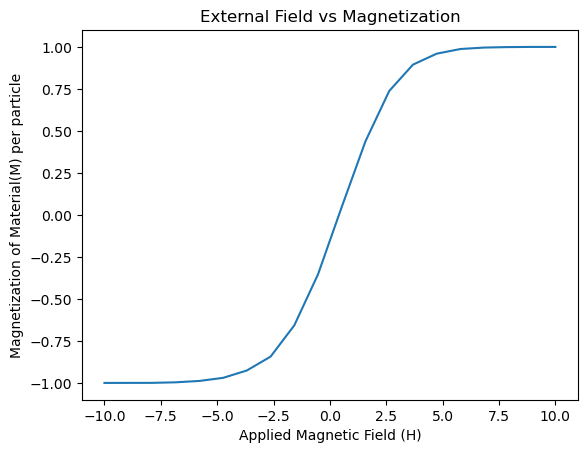

In [28]:
M = [m0, m1, m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19]
M = np.array(M)
H = External_field
plt.plot(H, M) 
plt.xlabel('Applied Magnetic Field (H)') 
plt.ylabel('Magnetization of Material(M) per particle')
plt.title('External Field vs Magnetization')

In [29]:
print(M)

[-1.     -0.9998 -0.9996 -0.9964 -0.9882 -0.9698 -0.926  -0.8434 -0.6572
 -0.3532  0.048   0.4388  0.7378  0.8946  0.9598  0.9876  0.9962  0.999
  1.      1.    ]
